In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart.csv")
df.drop(['fbs'],axis=1)
df.drop(['chol'],axis=1)
# в данных пропусков нет и все типы численные


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,0,1,115,1,1.2,1,1,3,0


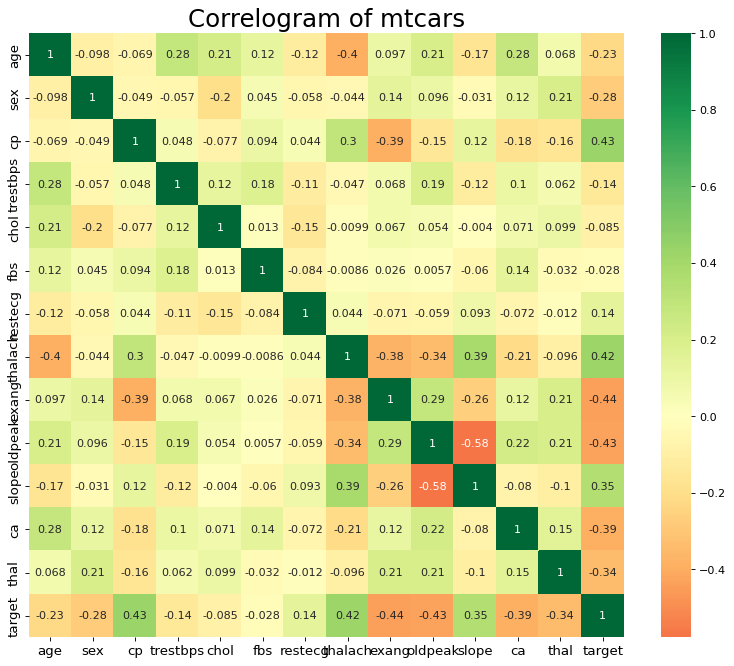

In [25]:
# кореляции columns=['target'],axis =1
import seaborn as sns
corel = df.corr()
corel

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
     

In [26]:
# подсчет уникальных значений в chol
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

# Выделим вектор признаков Х и вектор ответов y
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model = LogisticRegression()

model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
m=model.coef_
print(m[0])
# наиболее влиятельные признаки sex, restecg, ca, thal
print("Уравнение")
print(m[0][0],"*age + ",
      m[0][1],"*sex + ",
      m[0][2],"*cp + ",
      m[0][3],"*trestbps + ",
      m[0][4],"*chol + ",
      m[0][5],"*fbs + ",
      m[0][6],"*rectecg + ",
      m[0][7],"*thalach + ",
      m[0][8],"*exang + ",
      m[0][9],"*oldpeak + ",
      m[0][10],"*slope + ",
      m[0][11],"*ca + ",
      m[0][12],"*thal",)

[ 0.02203915 -1.12308135  0.71038223 -0.01770322 -0.0030962   0.10519071
  0.47191787  0.03669068 -0.86635533 -0.69249578  0.57185167 -1.04311556
 -1.29737901]
Уравнение
0.022039152388114144 *age +  -1.1230813486543583 *sex +  0.7103822326238652 *cp +  -0.017703221382709324 *trestbps +  -0.003096197307947394 *chol +  0.10519071257946504 *fbs +  0.47191787152116627 *rectecg +  0.03669067685576606 *thalach +  -0.8663553293925343 *exang +  -0.6924957828160359 *oldpeak +  0.5718516743867467 *slope +  -1.043115559325168 *ca +  -1.297379005838571 *thal


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

# 26+1 первый класс
# 10+47 второй класс

array([[31,  8],
       [ 8, 44]])

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 31
FP: 8
FN: 8
TP: 44


In [31]:
accuracy_score(y_test, answers_pred)
acc = (tp+tn)/(tp+tn+fp+fn)
#измеряет количество верно классифицированных 
#объектов относительно общего количества всех объектов
recall_score(y_test, answers_pred)
rec = tp/(tp+fn)
#Сколько объектов наша модель смогла правильно классифицировать 
#с позитивной меткой из всего множества позитивных
precision_score(y_test, answers_pred)
pre = tp/(tp+fp)
#долю объектов, названных классификатором положительными 
#и при этом действительно являющимися положительными
f1_score(y_test, answers_pred)
f1 = 2*pre*rec/(pre+rec)
#precision и recall, дает некоторый компромисс между ними двумя
print(acc,rec,pre,f1)
# 0.8681318681318682 0.8703703703703703 0.9038461538461539 0.8867924528301887

0.8241758241758241 0.8461538461538461 0.8461538461538461 0.8461538461538461
